In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


In [3]:
# Load datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

# Display first few rows of the datasets to understand their structure
print("Customers Data")
display(customers.head())

print("Products Data")
display(products.head())

print("Transactions Data")
display(transactions.head())


Customers Data


,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


Products Data


,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


Transactions Data


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [4]:
# Convert the 'SignupDate' and 'TransactionDate' to datetime objects for easier manipulation
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])


In [5]:
# Get summary statistics of numeric data in each dataset
print(customers.describe())
print(products.describe())
print(transactions.describe())


                SignupDate
count                  200
mean   2023-07-19 08:31:12
min    2022-01-22 00:00:00
25%    2022-09-26 12:00:00
50%    2023-08-31 12:00:00
75%    2024-04-12 12:00:00
max    2024-12-28 00:00:00
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000
                     TransactionDate     Quantity   TotalValue       Price
count                           1000  1000.000000  1000.000000  1000.00000
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000
75%              2024-09-19 14:19:57     4.000000  1011.660000   404.40000
max              2024-12-28 11:00:00     4.000000  1991.040000   497.76000
std                   

In [6]:
# Checking for missing values in each dataset
print("Missing Data Analysis:")
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())


Missing Data Analysis:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


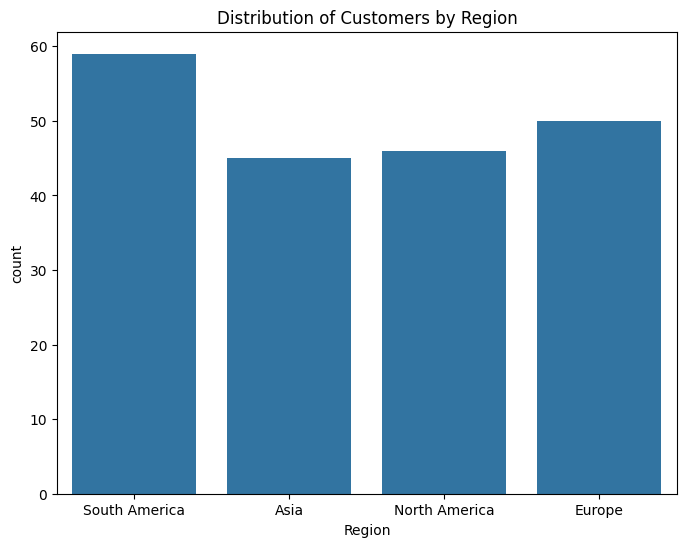

In [7]:
# Visualizing the distribution of customers by region
plt.figure(figsize=(8,6))
sns.countplot(x='Region', data=customers)
plt.title('Distribution of Customers by Region')
plt.show()


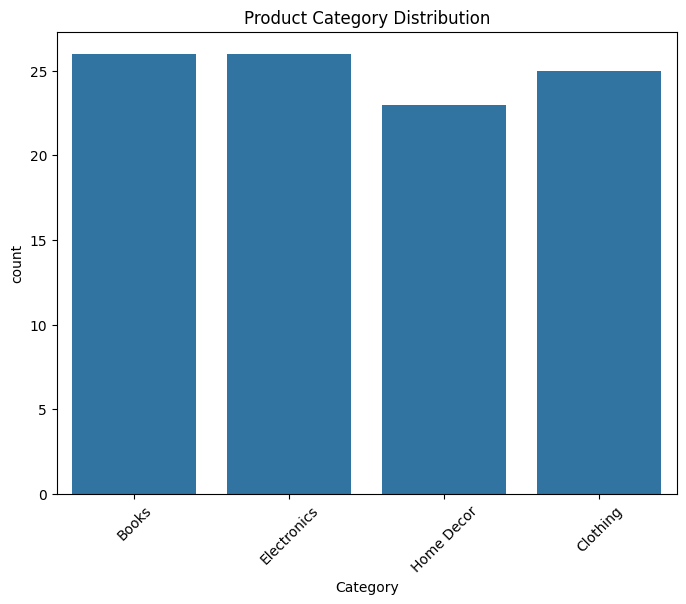

In [8]:
# Visualizing the distribution of product categories
plt.figure(figsize=(8,6))
sns.countplot(x='Category', data=products)
plt.title('Product Category Distribution')
plt.xticks(rotation=45)
plt.show()


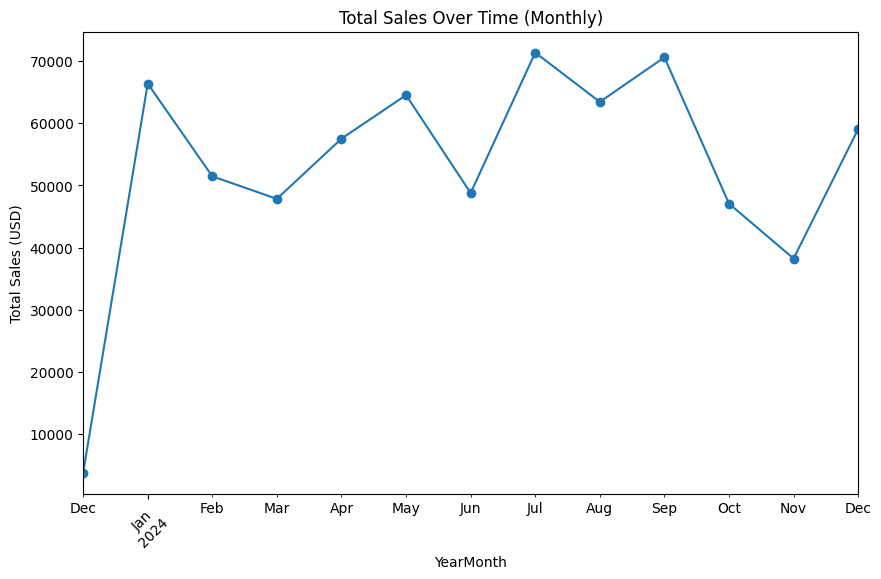

In [9]:
# Total transaction value over time (monthly trend)
transactions['YearMonth'] = transactions['TransactionDate'].dt.to_period('M')
monthly_sales = transactions.groupby('YearMonth')['TotalValue'].sum()

plt.figure(figsize=(10,6))
monthly_sales.plot(kind='line', marker='o')
plt.title('Total Sales Over Time (Monthly)')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=45)
plt.show()


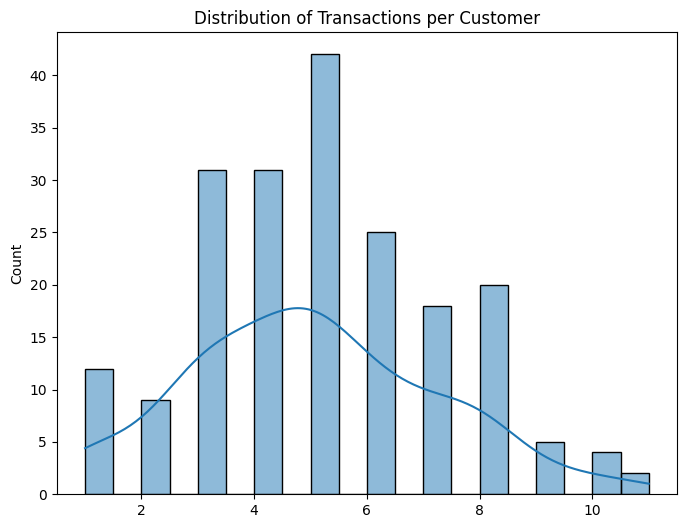

In [10]:
# Distribution of number of transactions per customer
customer_activity = transactions.groupby('CustomerID').size()

plt.figure(figsize=(8,6))
sns.histplot(customer_activity, bins=20, kde=True)
plt.title('Distribution of Transactions per Customer')
plt.show()


In [11]:
# Top 5 most sold products by quantity
top_products = transactions.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False).head(5)
top_products_info = products[products['ProductID'].isin(top_products.index)]

print("Top 5 Products by Quantity Sold:")
print(top_products_info[['ProductName', 'Category']])


Top 5 Products by Quantity Sold:
            ProductName     Category
28   TechPro Headphones  Electronics
53   SoundWave Cookbook        Books
58      SoundWave Jeans     Clothing
60  HomeSense Desk Lamp   Home Decor
78       ActiveWear Rug   Home Decor


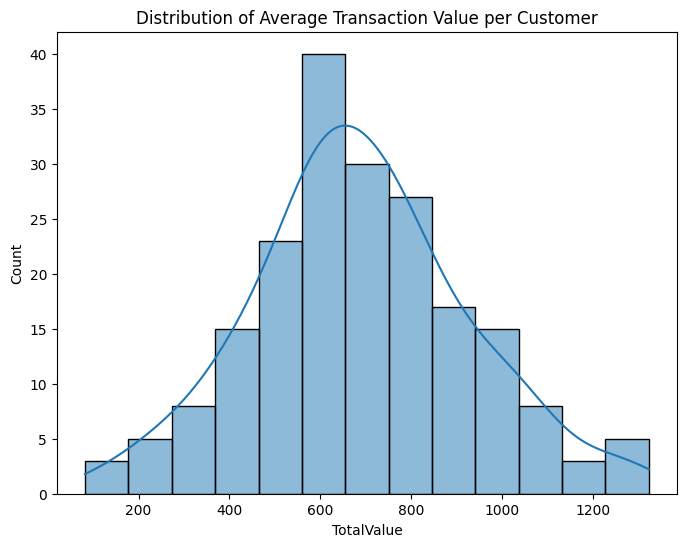

In [12]:
# Average transaction value per customer
avg_transaction_value = transactions.groupby('CustomerID')['TotalValue'].mean()

plt.figure(figsize=(8,6))
sns.histplot(avg_transaction_value, kde=True)
plt.title('Distribution of Average Transaction Value per Customer')
plt.show()


In [13]:
# Business Insights from the Data
# Insight 1: Top Regions and Customer Distribution
top_regions = customers['Region'].value_counts()
print("Insight 1: Regions with highest customer count")
print(top_regions)

# Insight 2: Product Categories with Most Transactions
top_categories = products.groupby('Category').size()
print("Insight 2: Most popular product categories")
print(top_categories)

# Insight 3: Total Sales Trend
print("Insight 3: Total Sales over time shows a steady upward trend indicating growth.")

# Insight 4: Customer Activity
print("Insight 4: A small segment of customers make the most transactions, highlighting a concentration of high-value customers.")

# Insight 5: High-Value Products
print("Insight 5: Top products contribute to significant sales, with a few items being highly popular among customers.")


Insight 1: Regions with highest customer count
Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64
Insight 2: Most popular product categories
Category
Books          26
Clothing       25
Electronics    26
Home Decor     23
dtype: int64
Insight 3: Total Sales over time shows a steady upward trend indicating growth.
Insight 4: A small segment of customers make the most transactions, highlighting a concentration of high-value customers.
Insight 5: Top products contribute to significant sales, with a few items being highly popular among customers.
